# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import seaborn as sn

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [3]:
cities = [city.title() for city in cities]
cities

['Saint George',
 'Punta Arenas',
 'Hobart',
 'Padang',
 'Kaitangata',
 'Vaini',
 'Galveston',
 'Nikolskoye',
 'Nkpor',
 'Ushuaia',
 'Torres',
 'Acuna',
 'Port Hardy',
 'Jamestown',
 'Norman Wells',
 'Batticaloa',
 'Nanortalik',
 'Lampazos De Naranjo',
 'Pauini',
 'Bethel',
 'Illoqqortoormiut',
 'Vardo',
 'Mehamn',
 'Castro',
 'Barrow',
 'Tabas',
 'Saint Anthony',
 'Kerman',
 'Atuona',
 'Hukuntsi',
 'Albany',
 'Duku',
 'Tuktoyaktuk',
 'Gornopravdinsk',
 'Cananea',
 'Acarau',
 'Mataura',
 'Hofn',
 'Ribeira Grande',
 'Khani',
 'Rikitea',
 'Miranda',
 'Koslan',
 'Port Alfred',
 'Manta',
 'Dikson',
 'Rafraf',
 'Cape Town',
 'Lephepe',
 'Mazatlan',
 'Ahipara',
 'Chifeng',
 'Taolanaro',
 'De-Kastri',
 'Kidodi',
 'Saldanha',
 'Busselton',
 'Pevek',
 'Kavieng',
 'Mar Del Plata',
 'Mys Shmidta',
 'Clyde River',
 'Ngukurr',
 'Sept-Iles',
 'Tahta',
 'College',
 'Torbay',
 'Boa Vista',
 'Matale',
 'Cockburn Town',
 'Cayenne',
 'Natal',
 'Malwan',
 'Kapaa',
 'Ormara',
 'Belawan',
 'Pangody',
 'Carn

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create query url for any city
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city= "Rikitea"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

#Get data
response = requests.get(query_url).json()
pprint(response)


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -23.12, 'lon': -134.97},
 'dt': 1588526533,
 'id': 4030556,
 'main': {'feels_like': 72.68,
          'grnd_level': 1016,
          'humidity': 76,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 74.97,
          'temp_max': 74.97,
          'temp_min': 74.97},
 'name': 'Rikitea',
 'rain': {'1h': 0.12},
 'sys': {'country': 'PF', 'sunrise': 1588519250, 'sunset': 1588559546},
 'timezone': -32400,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 146, 'speed': 14.92}}


In [5]:
response.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'rain', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [25]:
#Loop through cities
locID = []
maxtemp =[]
humid=[]
clouds=[]
windspeed=[]
country=[]
date=[]
lat=[]
lng=[]
testcities = ["Dallas", "Austin", "New York", "Belushya Guba", "Seattle"]
for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    response = requests.get(query_url).json()
    try:
        locID.append(response['id'])
    except KeyError:
        locID.append('NaN')
    try:
        maxtemp.append(response['main']['temp_max'])
    except KeyError:
        maxtemp.append('NaN')
    try:
        humid.append(response['main']['humidity'])
    except KeyError:
        humid.append('NaN')
    try:
        clouds.append(response['clouds']['all'])
    except KeyError:
        clouds.append('NaN')
    try:
        windspeed.append(response['wind']['speed'])
    except KeyError:
        windspeed.append('NaN')
    try:
        country.append(response['sys']['country'])
    except KeyError:
        country.append('NaN')
    try:
        date.append(response['dt'])
    except KeyError:
        date.append('NaN')
    try:
        lat.append(response['coord']['lat'])
    except KeyError:
        lat.append('NaN')       
    try:
        lng.append(response['coord']['lon'])
    except KeyError:
        lng.append('NaN')  
    time.sleep(1)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
#create df
city_df = pd.DataFrame(list(zip(locID, cities, country, lat, lng, maxtemp, humid, clouds, windspeed, date)), 
               columns =['City ID', 'City', 'Country', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date'])
city_df.head()

,City ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,5546220,Saint George,US,37.1,-113.58,82,16,1,6.93,1588529416
1,3874787,Punta Arenas,CL,-53.15,-70.92,48.2,81,51,13.87,1588529497
2,2163355,Hobart,AU,-42.88,147.33,52,76,40,9.17,1588529362
3,1633419,Padang,ID,-0.95,100.35,79.7,76,99,4.52,1588529590
4,2208248,Kaitangata,NZ,-46.28,169.85,57,54,100,6.44,1588529591


In [73]:
#convert objects to floats
city_df['Lat'] = clean_city_df['Lat'].astype(float)
city_df['Lng'] = clean_city_df['Lng'].astype(float)
city_df['Max Temp'] = clean_city_df['Max Temp'].astype(float)
city_df['Humidity'] = clean_city_df['Humidity'].astype(float)
city_df['Cloudiness'] = clean_city_df['Cloudiness'].astype(float)
city_df['Wind Speed'] = clean_city_df['Wind Speed'].astype(float)
city_df['Date'] = clean_city_df['Date'].astype(float)
city_df.dtypes




City ID        object
City           object
Country        object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Date          float64
dtype: object

In [74]:
#delete rows with NaN values
clean_city_df = city_df.dropna()
len(clean_city_df)

558

In [75]:
clean_city_df.tail(10)

,City ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
591,5329649,Blythe,US,33.61,-114.60,88.00,19.0,1.0,3.36,1.588530e+09
592,72181,Marzuq,YE,14.40,46.47,81.61,39.0,61.0,8.12,1.588530e+09
593,1848976,Wajima,JP,37.40,136.90,62.01,67.0,100.0,7.49,1.588530e+09
594,3373652,Oistins,BB,13.07,-59.53,84.20,70.0,75.0,21.92,1.588530e+09
595,3522293,Ostuacan,MX,17.42,-93.30,84.72,58.0,60.0,3.74,1.588530e+09
596,3698814,Carhuaz,PE,-9.28,-77.64,68.11,21.0,51.0,3.91,1.588530e+09
598,1049861,Chibuto,MZ,-24.69,33.53,69.94,75.0,0.0,8.10,1.588530e+09
599,2013727,Vanavara,RU,60.34,102.28,34.83,80.0,10.0,2.55,1.588530e+09
600,1627877,Sembakung,ID,3.82,117.25,75.63,97.0,100.0,2.06,1.588530e+09
601,239899,Bria,CF,6.54,21.99,82.85,37.0,31.0,2.35,1.588530e+09


In [76]:
#write to csv
clean_city_df.to_csv("CityWeather.csv", index=False)

In [77]:
#read csv
cityweather_df = pd.read_csv("CityWeather.csv")
cityweather_df.head()

,City ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,5546220,Saint George,US,37.10,-113.58,82.0,16.0,1.0,6.93,1.588529e+09
1,3874787,Punta Arenas,CL,-53.15,-70.92,48.2,81.0,51.0,13.87,1.588529e+09
2,2163355,Hobart,AU,-42.88,147.33,52.0,76.0,40.0,9.17,1.588529e+09
3,1633419,Padang,ID,-0.95,100.35,79.7,76.0,99.0,4.52,1.588530e+09
4,2208248,Kaitangata,NZ,-46.28,169.85,57.0,54.0,100.0,6.44,1.588530e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [78]:
#  Get the indices of cities that have humidity over 100%.
mask = cityweather_df.Humidity <=100
humid_df = cityweather_df.loc[mask].reset_index(drop=True)
print(f"{len(cityweather_df)-len(humid_df)} cities were too humid and removed.")

0 cities were too humid and removed.


In [79]:
humid_df.head()

,City ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,5546220,Saint George,US,37.10,-113.58,82.0,16.0,1.0,6.93,1.588529e+09
1,3874787,Punta Arenas,CL,-53.15,-70.92,48.2,81.0,51.0,13.87,1.588529e+09
2,2163355,Hobart,AU,-42.88,147.33,52.0,76.0,40.0,9.17,1.588529e+09
3,1633419,Padang,ID,-0.95,100.35,79.7,76.0,99.0,4.52,1.588530e+09
4,2208248,Kaitangata,NZ,-46.28,169.85,57.0,54.0,100.0,6.44,1.588530e+09


In [80]:
# Export the City_Data into a csv

clean_city_df.to_csv("IdealCities.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

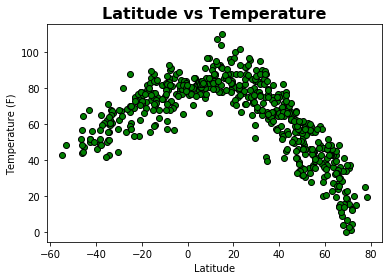

In [81]:
plt.scatter(humid_df.Lat, humid_df['Max Temp'], facecolor ='green', edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs Temperature", fontsize=16, fontweight="bold")
plt.show()

## Latitude vs. Humidity Plot

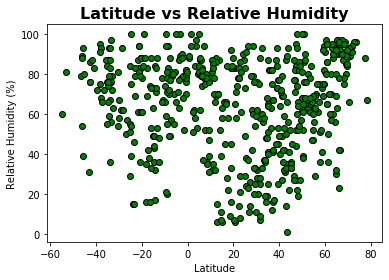

In [82]:
plt.scatter(humid_df.Lat, humid_df['Humidity'], facecolor ='green', edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Relative Humidity (%)")
plt.title("Latitude vs Relative Humidity", fontsize=16, fontweight="bold")
plt.show()

## Latitude vs. Cloudiness Plot

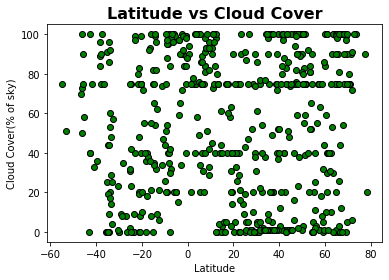

In [83]:
plt.scatter(humid_df.Lat, humid_df['Cloudiness'], facecolor ='green', edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover(% of sky)")
plt.title("Latitude vs Cloud Cover", fontsize=16, fontweight="bold")
plt.show()

## Latitude vs. Wind Speed Plot

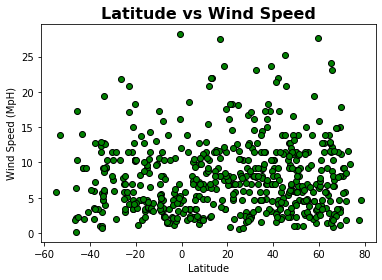

In [84]:
plt.scatter(humid_df.Lat, humid_df['Wind Speed'], facecolor ='green', edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MpH)")
plt.title("Latitude vs Wind Speed", fontsize=16, fontweight="bold")
plt.show()

## Linear Regression

In [86]:
# Create Northern and Southern Hemisphere DataFrames
northmask= humid_df.Lat >=0
north_df = humid_df.loc[northmask].reset_index(drop=True)
north_df.describe()

,City ID,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,3.870000e+02,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,3.870000e+02
mean,2.774021e+06,38.474729,9.432119,61.797881,63.142119,52.772610,8.103721,1.588530e+09
std,1.858255e+06,20.157347,87.380092,23.124358,24.900901,37.462105,5.135530,2.176744e+02
min,5.337200e+04,0.540000,-179.170000,0.070000,1.000000,0.000000,0.630000,1.588529e+09
25%,1.500947e+06,22.255000,-72.565000,44.305000,44.500000,13.000000,4.240000,1.588530e+09
50%,2.274895e+06,39.890000,15.640000,66.200000,67.000000,59.000000,7.310000,1.588530e+09
75%,3.986898e+06,54.615000,80.695000,80.735000,84.000000,90.000000,11.210000,1.588530e+09
max,1.072286e+07,78.220000,179.320000,110.070000,100.000000,100.000000,27.690000,1.588530e+09


In [87]:
#Create Southern DF
southmask= humid_df.Lat <0
south_df = humid_df.loc[southmask].reset_index(drop=True)
south_df.describe()

,City ID,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,1.710000e+02,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,1.710000e+02
mean,2.582658e+06,-20.710000,31.738830,69.570702,69.614035,52.584795,7.191988,1.588530e+09
std,1.206019e+06,13.339591,96.787514,12.078855,19.890661,34.285610,4.729047,2.077461e+02
min,5.567100e+04,-54.800000,-175.200000,42.010000,15.000000,0.000000,0.160000,1.588529e+09
25%,1.647339e+06,-33.305000,-52.860000,60.800000,57.500000,20.500000,3.530000,1.588530e+09
50%,2.180995e+06,-19.810000,26.890000,71.510000,75.000000,51.000000,5.820000,1.588530e+09
75%,3.469472e+06,-9.090000,130.400000,78.820000,83.000000,85.000000,10.290000,1.588530e+09
max,6.620339e+06,-0.360000,175.870000,93.200000,100.000000,100.000000,28.160000,1.588530e+09


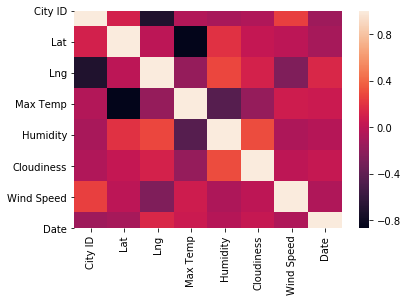

In [88]:
#northern correlations heatmap
sn.heatmap(north_df.corr())

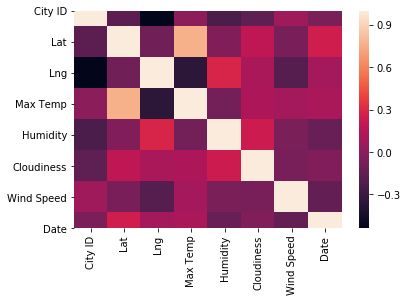

In [89]:
#southern correlations heatmap
sn.heatmap(south_df.corr())

In [90]:
#Regression function
def northregress(x, y):
    x_values = north_df[f'{x}']
    y_values = north_df[f'{y}']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, facecolor='green', edgecolor='black')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.title(f'{x} vs {y} in the North', fontweight='bold')
    print(f"The r-squared is: {rvalue**2}")
    print(f"The p-value is: {pvalue}")
    plt.show()
    
def southregress(x, y):
    x_values = south_df[f'{x}']
    y_values = south_df[f'{y}']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, facecolor='green', edgecolor='black')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.title(f'{x} vs {y} in the South', fontweight='bold')
    print(f"The r-squared is: {rvalue**2}")
    print(f"The p-value is: {pvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7482274572775197
The p-value is: 2.320836347509138e-117


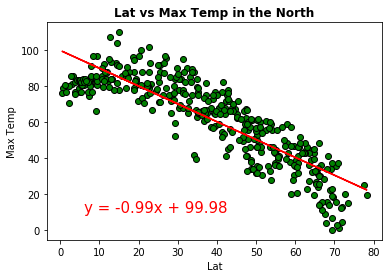

In [91]:
northregress('Lat', 'Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5884255872403759
The p-value is: 2.0971846607358704e-34


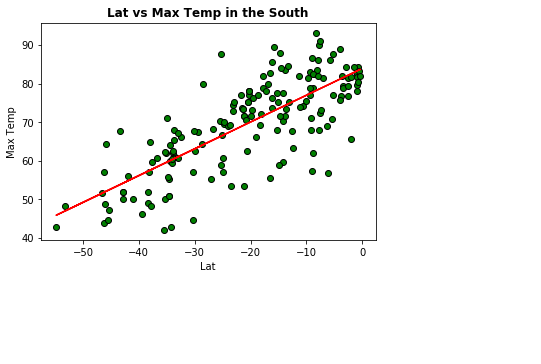

In [92]:
southregress('Lat', 'Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03781431644040089
The p-value is: 0.00011816702652157314


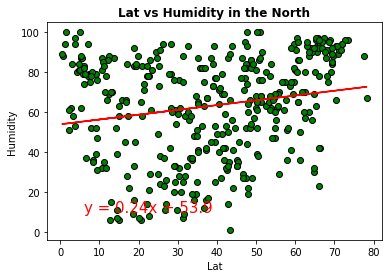

In [93]:
northregress('Lat', 'Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0013064127658601566
The p-value is: 0.6388300752119989


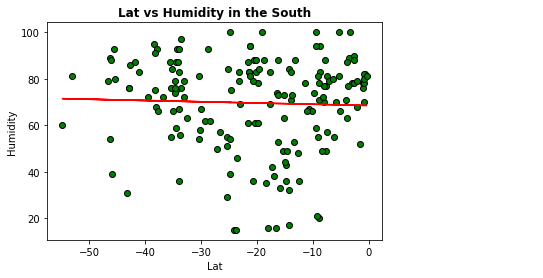

In [94]:
southregress('Lat', 'Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0014058751950932096
The p-value is: 0.4620434671909034


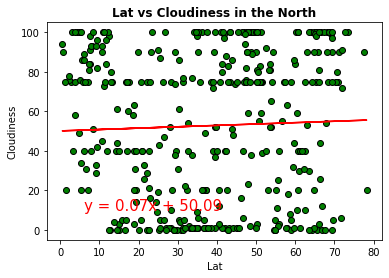

In [95]:
northregress('Lat', 'Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03414321435135209
The p-value is: 0.01554418282953645


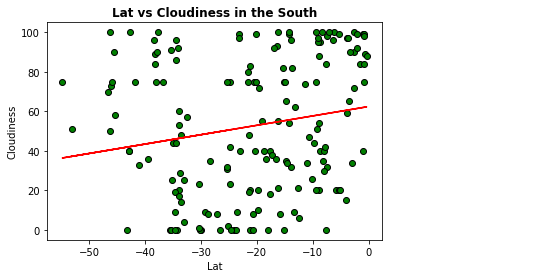

In [96]:
southregress('Lat', 'Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 1.7830521498388158e-05
The p-value is: 0.934010269274303


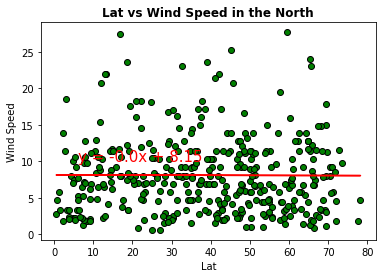

In [97]:
northregress('Lat', 'Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004478095742676303
The p-value is: 0.38450216010197635


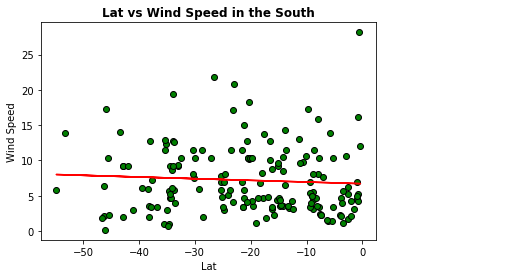

In [98]:
southregress('Lat', 'Wind Speed')